# Define the client

The client, Max, is a one-man start up team looking for an area with an abundance of smaller web/software companies where the cost of living tends to be lower. The assumption is that a higher quantity of smaller web/software comapnies will means a larger network/community of start-up support including incubators, mentorship programs, and meetups. Max is also interested in an area with a low cost of living so he can afford to purchase a hosue.

Plan:

Create two choropleth maps:
(a) Shows number of smaller web-software comapnies by US Zip Code
(b) Shows home prices by US Zip Code

(c) Preform some kind of filter function of the data from the previous maps to find the best city

In [74]:
# Import libraries
import pymongo
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
%matplotlib inline

In [75]:
# Connect to the local database
client = MongoClient()
db = client.companies

# Establish comp as alias for collection "companies"
comp = db.companies

In [76]:
# Get the median number of employyes for web and software comapnies
cursor = comp.find({
    "category_code": {"$in":["web", "software"]},
    "number_of_employees": {"$gt": 0}
},{"number_of_employees": 1, "_id": 0})

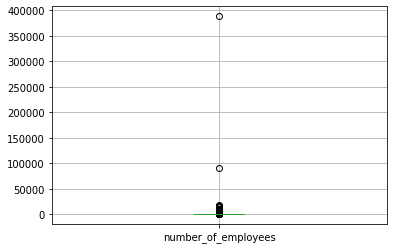

In [77]:
pd.DataFrame(list(cursor)).boxplot()

In [78]:
# We want companies that are smaller the 20
cursor = comp.find({
    "category_code": {"$in":["web", "software"]},
    "number_of_employees": {"$gt": 0, "$lt": 20}
},{"number_of_employees": 1, "_id": 0})

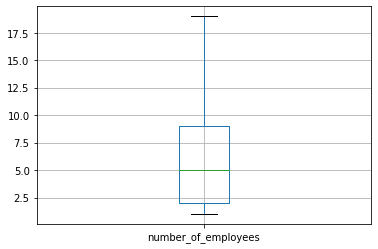

In [79]:
pd.DataFrame(list(cursor)).boxplot()

In [81]:
# Rewind cursor to get length
cursor.rewind()
len(list(cursor))

2431

# We want the 2431 companies in web/software with less than 20 employees


In [82]:
cursor = comp.find({
    "category_code": {"$in":["web", "software"]},
    "number_of_employees": {"$gt": 0, "$lt": 20}
},{"_id": 0})

In [ ]:
# process all of the geoJSON data
# Foudn code snippet from: https://gist.github.com/ericmhuntley/790937a759fd89ed77c8831f880f854c
# This file can be separated out into a stand-alone script

import os
import glob
import geojson

json_dir_name = "./"
json_pattern = os.path.join(json_dir_name,'*.geojson')
file_list = glob.glob(json_pattern)

collection = []

for file in file_list:
    with open(file) as f:
        layer = geojson.load(f)
        collection.append(layer)

geo_collection = geojson.GeometryCollection(collection)

with open('test_collection.geojson', 'w') as f:
    geojson.dump(geo_collection, f)
